# Question 1
This notebook is a toy to visualise the stable and unstable manifolds in a 2D System

Import required libraries

In [1]:
import numpy as np
from scipy.integrate import solve_ivp  # Used to numerically solve the ODE
import matplotlib.pyplot as plt

In [2]:
from matplotlib.patches import Rectangle

Define the function (right hand side of the eqution).

In [3]:
x_ini = np.array([1., 1.])

def system(t=0, x=x_ini):
    x_1, x_2 = x
    x_dot = np.empty_like(x)
    x_dot[0] = -x_1 * (1 + x_2)
    x_dot[1] = x_2 + x_1**2
    return x_dot

In [4]:
def system_jac(x=x_ini):
    x_1, x_2 = x
    jac = np.empty((2, 2))
    jac[0, 0] = -(1 + x_2)
    jac[0, 1] = - x_1
    
    jac[1, 0] = 2 * x_1
    jac[1, 1] = 1
    
    return jac

We define the zeros of the function above (found analytically but you could also do this numerically).

In [5]:
def equilibria():
    # returned as a list of points (x_1, x_2)
    eq = [
        [0, 0],
        [1, -1],
        [-1, -1],   
    ]
    return np.array(eq)

Determine their local stability using the jacobian

In [6]:
def stability_marker(eq=None, jac=system_jac):
    if eq is None:
        eq = equilibria()
    stab = list()
    for e in eq:
        j_eq = system_jac(e)
        eig_vals = np.linalg.eigvals(j_eq)
        if isinstance(eig_vals[0], float):
            if np.sum(eig_vals < 0) == 2:
                stab.append('o')
            else:
                stab.append('x')
        else:
            stab.append("+")
    return stab

In [97]:
# funciton for plotting the phase space of a given system
def plot_phase_portrait(sys, sys_jac, eq, x_bounds=[-2, 2], y_bounds=[-2, 2]):
    
    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    U, V = sys(t=0, x=[X, Y])
    
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    axs.streamplot(X, Y, U, V, density=[1.2, 1.2])
    
    marker = stability_marker(eq)

    for e, m in zip(eq, marker):
        axs.plot(e[0], e[1], m, c='red', ms=20)
        
    axs.set_xlim(x_bounds[0], x_bounds[1])
    axs.set_ylim(y_bounds[0], y_bounds[1])
    return axs
        

In [98]:
def plot_eigan_direction(vecs, eq, x_bounds):
    v1, v2 = vecs[:, 0], vecs[:, 1]
    lines = list()
    
    x = np.linspace(x_bounds[0], x_bounds[1], 10)
    
    for v in [v1, v2]:
        if v[0] != 0:
            m = v[1] / v[0]
            c = eq[1] - m * eq[0]
            lines.append([x, m * x + c])
    
        else:
            lines.append([np.ones_like(x) * eq[0], x])
    return lines

## Plot of the phase space

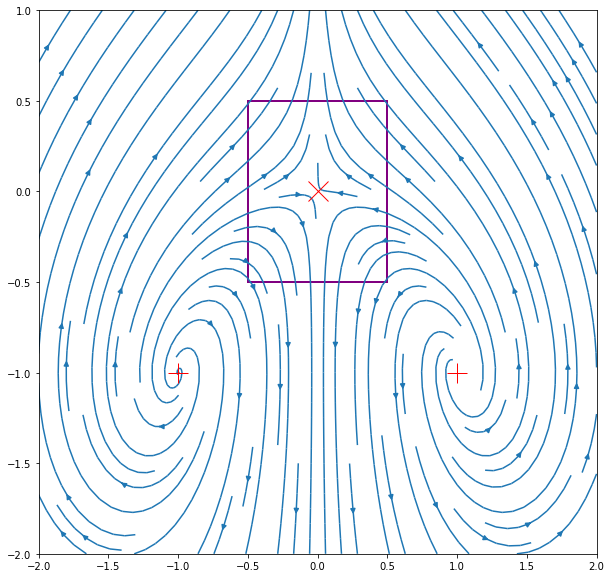

In [99]:
ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-2, 2], y_bounds=[-2, 1])
# Create a Rectangle patch
rect = Rectangle((-0.5, -0.5), 1, 1, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

We will focus on the saddle point at $(x,y)=(0, 0)$

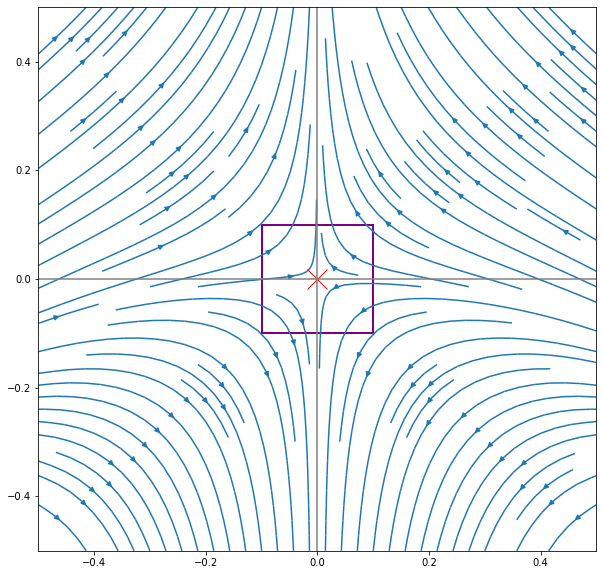

In [100]:
# calculate eigan vectors at this point:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-0.5, 0.5])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-0.5, 0.5], y_bounds=[-0.5, 0.5])

# Create a Rectangle patch
rect = Rectangle((-0.1, -0.1), 0.2, 0.2, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')

Zooming in more we can see the linear system describes the dynamics close to the equilibrium

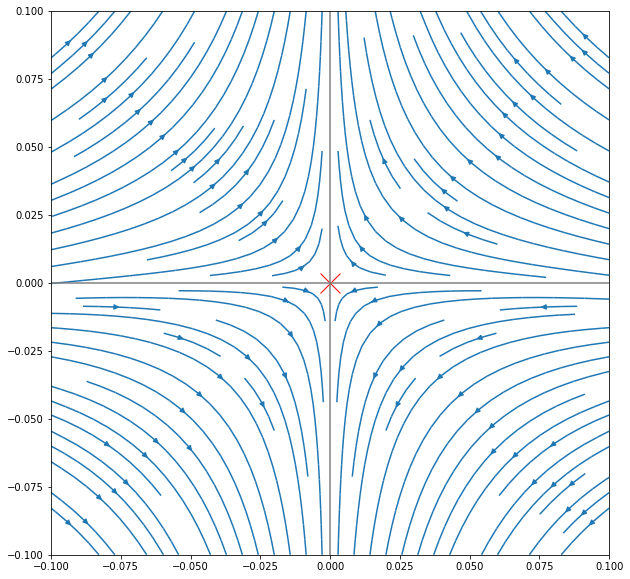

In [101]:
# calculate eigan vectors at this point:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-0.2, 0.2])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-0.1, 0.1], y_bounds=[-0.1, 0.1])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')

We define the stable manifold, found analytically

In [121]:
# Define the stable and unstable curves
def w_unstable(x):
    return -1/3 * x**2 - 2/45 * x**4

x_vals = np.linspace(-1.5, 1.5, 1000)

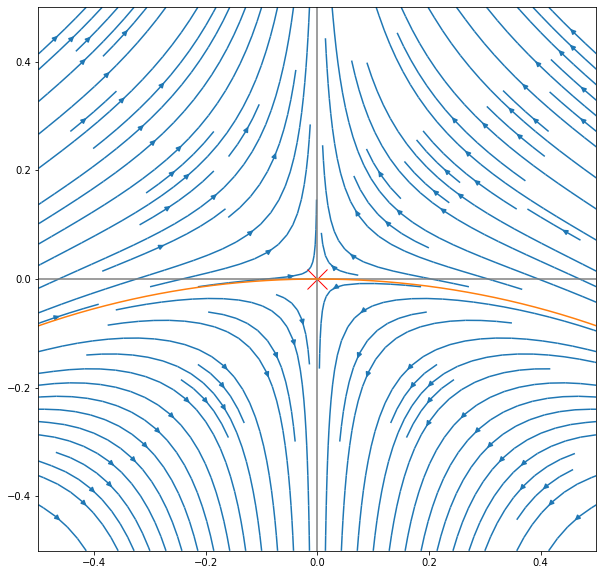

In [122]:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-1, 1])

ax = plot_phase_portrait(system, system_jac, equilibria()[:-1], x_bounds=[-0.5, 0.5], y_bounds=[-0.5, 0.5])


for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
ax.plot(x_vals, w_unstable(x_vals))

Zoomed out version:

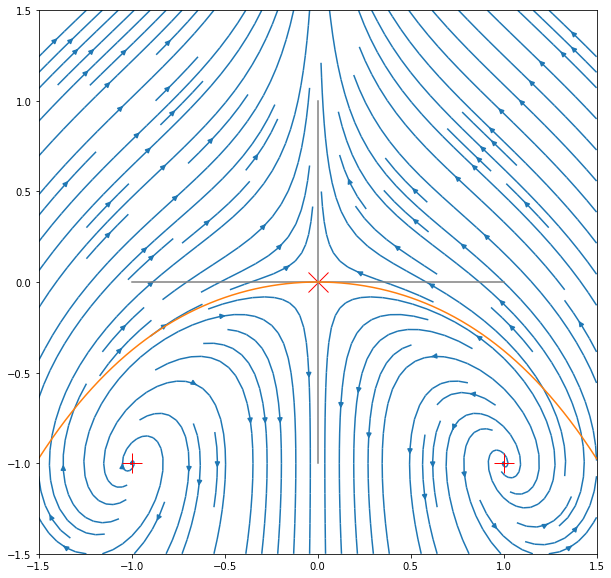

In [123]:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-1, 1])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-1.5, 1.5], y_bounds=[-1.5, 1.5])


for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
ax.plot(x_vals, w_unstable(x_vals))

# Generating unstable to many orders of magnitude

In [124]:
import sympy as sy

In [125]:
x = sy.Symbol('x')
s = sy.Symbol('s')
s_prime = sy.Symbol('s_prime')

In [126]:
order = 100

# Generate coeficients
coefs = list()
stable = 0
for i in range(2, order+2):
    s_coef = sy.Symbol('s'+str(i))
    coefs.append(s_coef)
    stable += s_coef * x ** i
    
stable_d = sy.diff(stable, x)

In [127]:
%%time
eq1 = - x * s_prime * (1 + s)
eq2 = s + x**2

eq_comb_1 = eq1.subs(s, stable)
eq_comb_1 = eq_comb_1.subs(s_prime, stable_d).expand().as_coeff_exponent(x)

eq_comb_2 = eq2.subs(s, stable)
eq_comb_2 = eq_comb_2.subs(s_prime, stable_d).expand().as_coeff_exponent(x)

CPU times: user 3.75 s, sys: 0 ns, total: 3.75 s
Wall time: 3.75 s


In [128]:
%%time
num_coefs = list()
s_x = 0

for i in range(order):
    coef1 = eq_comb_1[0].coeff(x**(i+2))
    coef2 = eq_comb_2[0].coeff(x**(i+2))

    eq_coef = sy.Equality(coef1, coef2)
    
    for j in range(i):
        eq_coef = eq_coef.subs(coefs[j], num_coefs[j])
    coef_ = sy.solve(eq_coef)[0]
    num_coefs.append(coef_)

    s_x += coef_ * x**(i+2) 

CPU times: user 44.8 s, sys: 0 ns, total: 44.8 s
Wall time: 44.8 s


In [129]:
s_x

-562486391141515793492210334691620823501195032345941723288987934160461496929944524754324128160728355330238461058923801515984934574118383292328344596823851944378368*x**100/88903245279844652498740975172209441368183728890163828575911722858676139921457421799523880213769621372408740129538792283200813286313518966898317440622308314777910709381103515625 - 3078122927392391048602207660029538241755698849574031597487238823948270185168416664457028324154090704264069758033434027105746211445520926453792085464198414336*x**98/284058833625576236558951192013724817196708542536030153281087979294803644618043390462297599377565211240704330692797055849490269714763960412968500848510302603244781494140625 - 359738582782247030951800070371020342759549000959633675617822190921738945792954606786449986168404696968163486961369404317693014587574549025377111553651769344*x**96/19370835837362527646825897224190706950473637535902572517798996208700639109980153091458139324557645606043990048141805963428764071682444707847324479860

$\frac{562486391141515793492210334691620823501195032345941723288987934160461496929944524754324128160728355330238461058923801515984934574118383292328344596823851944378368 x^{100}}{88903245279844652498740975172209441368183728890163828575911722858676139921457421799523880213769621372408740129538792283200813286313518966898317440622308314777910709381103515625} - \frac{3078122927392391048602207660029538241755698849574031597487238823948270185168416664457028324154090704264069758033434027105746211445520926453792085464198414336 x^{98}}{284058833625576236558951192013724817196708542536030153281087979294803644618043390462297599377565211240704330692797055849490269714763960412968500848510302603244781494140625} - \frac{359738582782247030951800070371020342759549000959633675617822190921738945792954606786449986168404696968163486961369404317693014587574549025377111553651769344 x^{96}}{19370835837362527646825897224190706950473637535902572517798996208700639109980153091458139324557645606043990048141805963428764071682444707847324479860253632068634033203125} - \frac{1757426922322930398752351967710583021173740089824604413136460862175412906195933388161328753167060018720727521230454436739514379471995498005073846337536 x^{94}}{55180806446396958910520640560246770197592994407814918735878499809711742179676430213558280109723440165575129109943243316142934260710068874318315647542476654052734375} - \frac{2402772645924772190220885264747150018307482969919963995663210339983439401921738966448152227571364258679953240842964464308844262371190003927126900736 x^{92}}{43961317111291754704542251145547897267342499146831107391919476075200472623862907365662160609492358467362167440754851018878174595361865193541161715984344482421875} - \frac{5079160822333278387558911792593720996122430104632602772097168694599933242418231142033949551451517690606919595569911070154631835819158355836928 x^{90}}{54110507374345820376697118640674067232002391111920029541550327034755164372778419669792248165049776223104156776915452774691140341154574044048786163330078125} - \frac{550401020526988156328906888374074666094478689644566181730776144764639809444428727957606001156588365158298342860234638603549444574162190336 x^{88}}{3411697463610109269344078556549107309857194138311059668760082437287792707678056705063031172792480913251807175939341688971759398178197443485260009765625} - \frac{9918099359985024247059117544878668096692262281408584258953237314618473669317676135013050049322632473271355727723549532144560766976 x^{86}}{35741767610576722266686596404360648422824067572618397598110999134529778038253933878269663426795829438392704253139181885504908859729766845703125} - \frac{90653012407276099619069880902450548190417398717118037407968992607006659028257310610766201146659167386676282886272077187688431616 x^{84}}{189768571476619021542415735978583551453517364258740669751995025066538935290156783126456869981697626902134611860797323743067681789398193359375} - \frac{10834085900319070874183714477136750592237806404604506618853842479186649204098156492534274265398605110067115900753793777664 x^{82}}{13162831316631428592678572255936899968568961048092144018793249664734704608427069708017737069770701343955462889526896178722381591796875} - \frac{216132255521804838984322865098038652029110805621057113546195728918401303270321278316763166172900496698516303176360001536 x^{80}}{152262564951860837110678256773140691614413860107457165937078541226569044297676838889006768520623859898558079714293777942657470703125} - \frac{4801061558881011437289681847635535247453367487225135283968643362384274078334821622895397370658407013939962462601216 x^{78}}{1959333700742244215271868178583073932710179717614882320188267631603201644773827763867421877879228271509174712002277374267578125} - \frac{93925157504171081493521997783912024621374767133345146679979510337655209145326405471714610323631542445986021376 x^{76}}{22182456235842052834959078541608392771034853739331487211094546303197973797041415466182879746774453222574293613433837890625} - \frac{372198042841890041845813165811206162367380598411877746776360647628167244743630481535761061661750090268672 x^{74}}{50815181057571008391517486332660168582468282878240824121558436848741427014082171497611711499712552130222320556640625} - \frac{378358378265185120201084508709671589537032225876644197367426415159376742646549027855176832033826537472 x^{72}}{29827970552345842246305632340952054602807471178032891368957788977481191725944118287080248195573151111602783203125} - \frac{71377779293064502345465822671881911845066782490020413491391987809694942795519416069612441174016 x^{70}}{3245379836294797303695540621460755927739745558815507753840166236811227594115522620752371185398101806640625} - \frac{9737885179474928801117337829660341248175624017830104987516629839557621151955752330704453632 x^{68}}{255035091753205456044222437208259986283470843203586062746907309637756640451124743706726551055908203125} - \frac{23030415946298615718668660882217687351941575584015273731290635264635573913810084357472256 x^{66}}{346966201048131953082170572847620573736552340238909843819049226208981366114153996708316802978515625} - \frac{3787864911102393885267340699105231858057669047477124828987536003134142364462245612617728 x^{64}}{32780140763985440465640041523756953849599841283021027730356408553163678327004280713558197021484375} - \frac{4318230882906595785391742459542406580017226199131690076622895849214579117284917248 x^{62}}{21433544048088244925666226309109186927817286872187858341984790326283884258708095550537109375} - \frac{2652574725556453440011714814275134931671479949491379660291055881367321147604992 x^{60}}{7539185212953426145212821429629555767459072058741230620162630210599479274532318115234375} - \frac{664853227991832009243311074914358309883292354891692037432772025133201096704 x^{58}}{1080188465227922875499723029829202801995058165671374866450478834361810703277587890625} - \frac{1818233636108159434288667920745417728395525778154696163638023794515247104 x^{56}}{1685524105009941532929349898576641445136222050280864736457567188404224395751953125} - \frac{166933500534736980563373997452132828932894895932357810181898709762048 x^{54}}{88120131262049477795743237436135497120488407549058226757208893062591552734375} - \frac{83413246561519676568256897782798657832951102659049904051371114496 x^{52}}{25019649235767768026553103851681564985048498909769936615433409881591796875} - \frac{138876854587468465312328314830828384799625752960818483298304 x^{50}}{23614795942532675131925933191527882222449507533702464065679931640625} - \frac{12703139631977826427951449408920565794076007923976241152 x^{48}}{1221470968026443542980525254720297139537492605094608001708984375} - \frac{8888481532623903198048567149938222763512605880352768 x^{46}}{481983429107986491201668715782945162842708079467364501953125} - \frac{12338168991791111614638777640783539823349224964096 x^{44}}{376178997233828406041548083172409608245352262640380859375} - \frac{4150919542793852144000410874056655692343803904 x^{42}}{70926905119934087391966106337057883618883992919921875} - \frac{74804110922503605788991817495281551862136832 x^{40}}{713767586407793353035430583857072993712236376953125} - \frac{415203702937810384318640413466699235328 x^{38}}{2203610734176514682355774209659011391845703125} - \frac{2880316771428746535930828016610312192 x^{36}}{8465299943808318511393379465467022900390625} - \frac{9386584377138742045996720446439424 x^{34}}{15201937940967417368863583162434423828125} - \frac{924407320097947150907938237841408 x^{32}}{820422047607765381811685440512333984375} - \frac{1793806460451117351305216 x^{30}}{866970724496588501974168359375} - \frac{7442950336266923349671936 x^{28}}{1944963648797331976569615234375} - \frac{17181850401611166072832 x^{26}}{2407558893294663808308984375} - \frac{35323717470790258688 x^{24}}{2628560142171044722265625} - \frac{43911769582552064 x^{22}}{1715610349202546671875} - \frac{180229406048768 x^{20}}{3646707988643094375} - \frac{283693920512 x^{18}}{2923447161009375} - \frac{139964416 x^{16}}{719371823625} - \frac{14803456 x^{14}}{36942530625} - \frac{182048 x^{12}}{212837625} - \frac{1616 x^{10}}{841995} - \frac{592 x^{8}}{127575} - \frac{4 x^{6}}{315} - \frac{2 x^{4}}{45} - \frac{x^{2}}{3}$

In [130]:
f = sy.lambdify(x, s_x)

## Plot phase space 

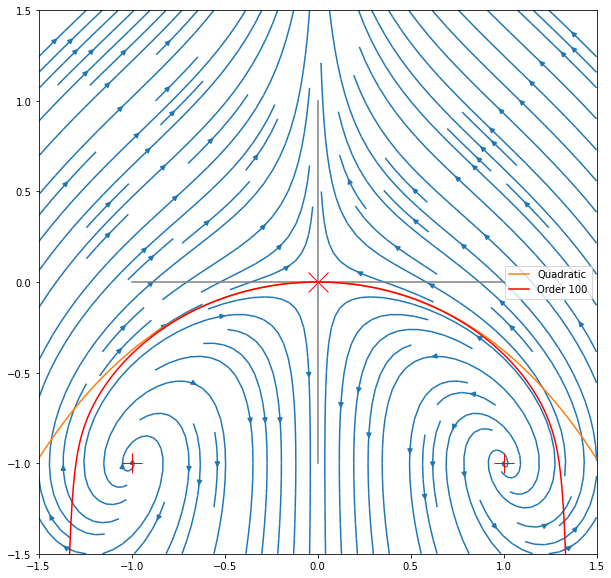

In [131]:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-1, 1])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-1.5, 1.5], y_bounds=[-1.5, 1.5])


for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
ax.plot(x_vals, w_unstable(x_vals), label='Quadratic')
ax.plot(x_vals, f(x_vals), c='red', label='Order ' + str(order))
ax.legend()

The true unstable manifold is the hetroclinic trajectory that links the saddle point, and the foci, as shown below. We find this numerically, by just placing an initial condition very close to the saddle point, on the manifold of order 100

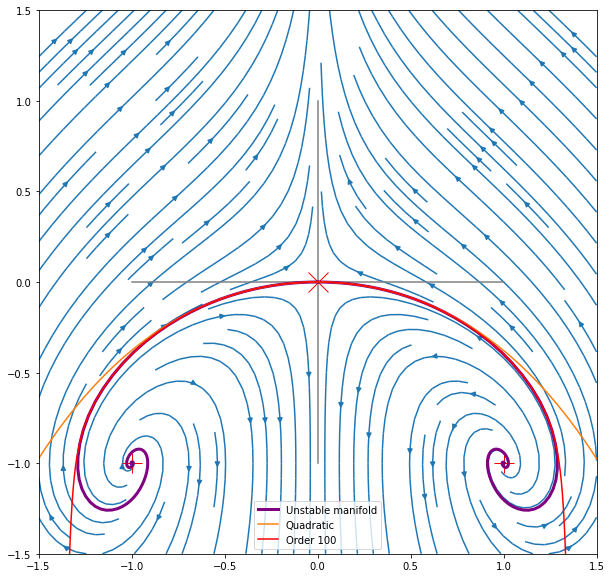

In [143]:
jac = system_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-1, 1])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-1.5, 1.5], y_bounds=[-1.5, 1.5])


for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
# Neively find the unstable manifold by following a trajectory on it (backwards in time)
# We have to do this twice, one for each side of the saddle, 
# BUT! we will can use the symettry, so we only have to do it once!
ic_x = x_vals[x_vals > 0][np.argmin(x_vals[x_vals > 0])]
ic_y = w_unstable(ic_x) # symteric in y so just need this one ic

unstable_manifold_sol = solve_ivp(system, (0, -100), [ic_x, ic_y], t_eval=np.linspace(0, -100, 1000))
  
ax.plot(unstable_manifold_sol.y[0], unstable_manifold_sol.y[1], c='purple', label='Unstable manifold', linewidth=3)
ax.plot(-unstable_manifold_sol.y[0], unstable_manifold_sol.y[1], c='purple', linewidth=3)
    
ax.plot(x_vals, w_unstable(x_vals), label='Quadratic')
ax.plot(x_vals, f(x_vals), c='red', label='Order ' + str(order))
ax.legend()